In [ ]:
import os

from data_loader import LFW2DataLoader
from siamese_network import SiameseNetwork
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
def plot_losses(history):
  plt.plot(history.history['binary_accuracy'])
  plt.plot(history.history['val_binary_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

### Load Data

In [ ]:
train_file_path = 'pairsDevTrain.txt'
test_file_path = 'pairsDevTest.txt'
images_path = os.path.join(os.path.dirname(os.path.realpath(__file__)), 'lfw2', 'lfw2')

In [ ]:
input_size = 105
data_loader = LFW2DataLoader((input_size, input_size), images_path)
train_X, train_y = data_loader.load_images_from_path(train_file_path)
test_X, test_y = data_loader.load_images_from_path(test_file_path)

### Train Network

In [ ]:
input_shape = (input_size, input_size, 1)
model = SiameseNetwork(input_shape, learning_rate=0.0001, decay_rate=1, kernel_regularizer_conv=1e-4, use_sgd=False)

In [ ]:
%%time
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, patience=20, restore_best_weights=True)
history = model.fit(train_X,
                    train_y.astype(float),
                    batch_size=64,
                    validation_split=0.15,
                    epochs=200,
                    verbose=1,
                    callbacks=[early_stopping])

Epoch 1/200
30/30 [==============================] - 4s 85ms/step - loss: 1.0313 - binary_accuracy: 0.6339 - val_loss: 1.3530 - val_binary_accuracy: 0.0000e+00
Epoch 2/200
30/30 [==============================] - 2s 76ms/step - loss: 0.8685 - binary_accuracy: 0.7885 - val_loss: 1.3222 - val_binary_accuracy: 0.0000e+00
Epoch 3/200
30/30 [==============================] - 2s 75ms/step - loss: 0.7360 - binary_accuracy: 0.8938 - val_loss: 1.2783 - val_binary_accuracy: 0.0091
Epoch 4/200
30/30 [==============================] - 2s 76ms/step - loss: 0.6149 - binary_accuracy: 0.9674 - val_loss: 1.2078 - val_binary_accuracy: 0.1455
Epoch 5/200
30/30 [==============================] - 2s 76ms/step - loss: 0.5074 - binary_accuracy: 0.9968 - val_loss: 1.2422 - val_binary_accuracy: 0.1606
Epoch 6/200
30/30 [==============================] - 2s 75ms/step - loss: 0.4370 - binary_accuracy: 0.9999 - val_loss: 1.1899 - val_binary_accuracy: 0.3424
Epoch 7/200
30/30 [==============================] - 2s 

Test evaluation -  [0.9368032217025757, 0.7110000252723694]
Train evaluation -  [0.4927349388599396, 0.9386363625526428]


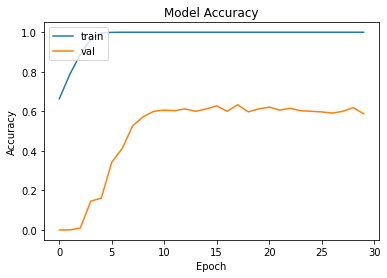

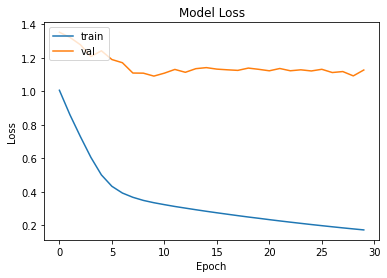

In [ ]:
train_eval = model.evaluate(train_X, train_y, verbose=False)
test_eval = model.evaluate(test_X, test_y, verbose=False)

print('Test evaluation - ', test_eval)
print('Train evaluation - ', train_eval)
plot_losses(history)

### Examine Results

In [ ]:
def show_images(img1, img2, label):
  print('Same person' if label else 'Different People')
  plt.subplot(1,2,1)
  plt.imshow(img1 * 255, cmap='gray')
  plt.subplot(1,2,2)
  plt.imshow(img2 * 255, cmap='gray')
  plt.show()


In [ ]:
test_predictions = model.predict(test_X)
test_predictions = (test_predictions >= 0.5).astype(int)

In [ ]:
train_predictions = model.predict(train_X)
train_predictions = (train_predictions >= 0.5).astype(int)

#### Look at mistakes the model makes

In [ ]:
mistakes = test_X_array[:, (test_predictions[:,0] != test_y), :, :, 0]
mistake_labels = test_y[(test_predictions[:,0] != test_y)]

In [ ]:
random_mistakes = np.random.randint(0, mistakes.shape[0] - 1, 10)

Different People


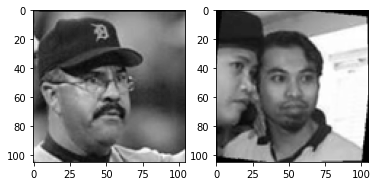

Same person


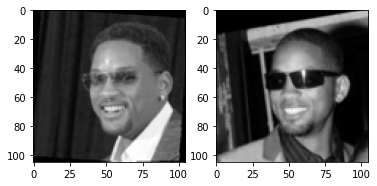

Same person


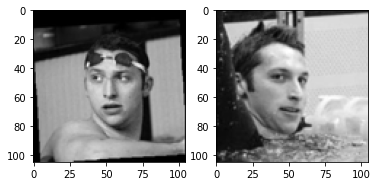

Different People


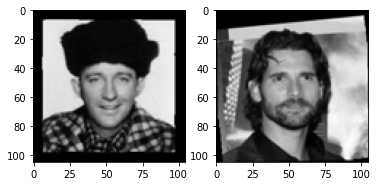

Same person


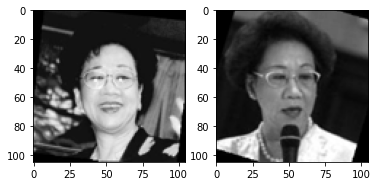

Different People


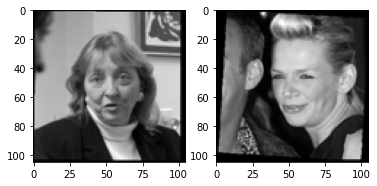

Different People


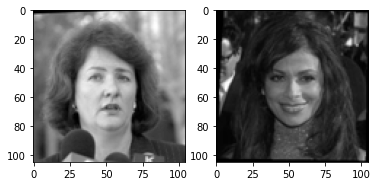

Different People


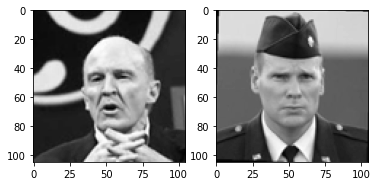

Same person


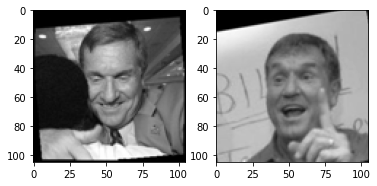

Different People


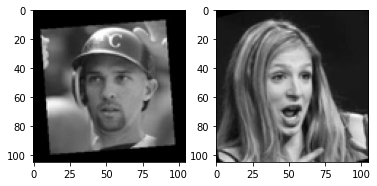

In [ ]:
for images, label in zip(mistakes[random_mistakes], mistake_labels[random_mistakes]):
  show_images(images[0], images[1], label)


Ther is an indication that the model isn't able to successfully predict when there are glasses in the images, as can be seen from examples 1,2,3,5.

#### Look at correct classifications

In [ ]:
correct = test_X_array[:, (test_predictions[:,0] == test_y), :, :, 0]
correct_labels = test_y[(test_predictions[:,0] == test_y)]

In [ ]:
random_correct = np.random.randint(0, correct.shape[0] - 1, 100)

In [ ]:
for images, label in zip(correct[random_correct], correct_labels[random_correct]):
  show_images(images[0], images[1], label)

Output hidden; open in https://colab.research.google.com to view.